# Edge Detection

This notebook tests the edge detection algorithm.

## Import all the things

Import regular packages

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
%matplotlib inline

import cv2
from scipy import signal
import numpy as np
from cmath import pi

Add relative path

In [3]:
import sys
import os
sys.path.append(os.path.join('..','Scripts'))

Import Diffraction Tool

In [4]:
from DiffractionTool import ImageSys4f
from DiffractionTool import HelperFunctions as hp

### Global Paramters

In [5]:
N_size=2001
#μm plane [400,400]μm 
interval=0.2
actualSize=N_size*interval
xyInterval=[interval]*2

In [6]:
currentPath=os.getcwd()
dataPath=os.path.join(currentPath,"data")

### Sample Image

In [7]:
#filename='maki.png'
filename='Prob3Data.png'
imgActualSize=200

In [8]:
grayImg=cv2.imread(os.path.join(dataPath,filename),cv2.IMREAD_GRAYSCALE)
grayImg=cv2.flip(grayImg,0)
grayImg=hp.normalize(grayImg)

AttributeError: type object 'HelperFunctions' has no attribute 'normalize'

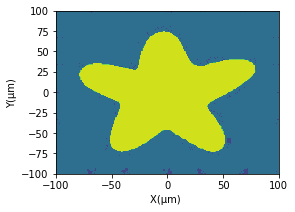

In [ ]:
labels=['X(μm) ','Y(μm)']
range=[[-imgActualSize/2.0,imgActualSize/2.0]]*2
hp.displace_2d(grayImg,labels,range)

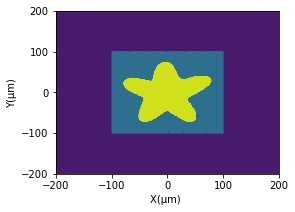

In [ ]:
targetImg=hp.pad_and_resize(grayImg,imgActualSize,actualSize,N_size)
labels=['X(μm) ','Y(μm)']
range=[[-actualSize/2.0,actualSize/2.0]]*2
hp.displace_2d(targetImg,labels,range)

### Mathamatical Convolution

#### Define a kernel

Scharr Kernel

In [ ]:
edgeFilter_scharr=np.array([[ -3-3j, 0-10j,  +3 -3j],[-10+0j, 0+ 0j, +10 +0j],\
    [ -3+3j, 0+10j,  +3 +3j]])

In [ ]:
print(edgeFilter_scharr)

[[ -3. -3.j   0.-10.j   3. -3.j]
 [-10. +0.j   0. +0.j  10. +0.j]
 [ -3. +3.j   0.+10.j   3. +3.j]]


Center Kernel

In [ ]:
edgeFilter_center=10*np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])

In [ ]:
print(edgeFilter_center)

[[  0 -10   0]
 [-10  40 -10]
 [  0 -10   0]]


#### Edge detection results

Scharr

In [ ]:
resImg=signal.convolve2d(targetImg,edgeFilter_scharr,mode='same')

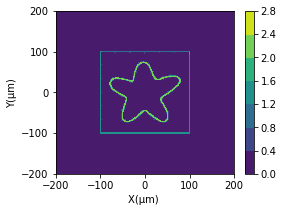

In [ ]:
labels=['X(μm) ','Y(μm)']
range=[[-actualSize/2.0,actualSize/2.0]]*2
hp.displace_2d(np.log(np.absolute(resImg)+1),labels,range,enableColorBar=True)

Center

In [ ]:
resImg=signal.convolve2d(targetImg,edgeFilter_center,mode='same')

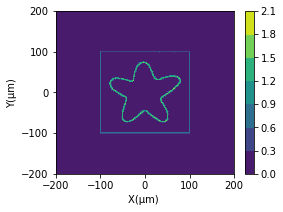

In [ ]:
labels=['X(μm) ','Y(μm)']
range=[[-actualSize/2.0,actualSize/2.0]]*2
hp.displace_2d(np.log(np.absolute(resImg)+1),labels,range,enableColorBar=True)

### Using 4F physical imaging system

#### Parameters

In [ ]:
waveLambda=0.633
f=1000
r=400
k=2.0*pi/waveLambda

In [ ]:
edgeDetector=ImageSys4f(N_size,xyInterval,k,f,r)

#### Performance Test

##### None filter

In [ ]:
U0=np.sqrt(targetImg)

In [ ]:
Uen=edgeDetector.generate_image(U0)

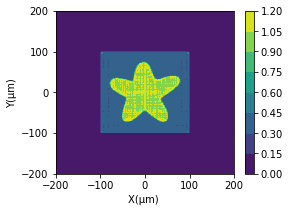

In [ ]:
labels=['X(μm) ','Y(μm)']
range=[[-actualSize/2.0,actualSize/2.0]]*2
#hp.displace_2d(np.log(hp.intensity(Ue)),labels,range,enableColorBar=True)
hp.displace_2d(np.flip(hp.intensity(Uen),(0,1)),labels,range,enableColorBar=True)

##### Scharr Filter

In [ ]:
fqFilter=edgeDetector.calConvFilter(edgeFilter_scharr,1e5)

In [ ]:
Ues=edgeDetector.generate_image(U0,fqFilter)

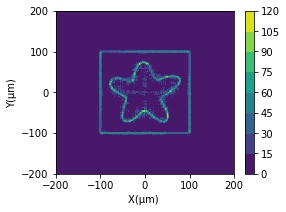

In [ ]:
labels=['X(μm) ','Y(μm)']
range=[[-actualSize/2.0,actualSize/2.0]]*2
#hp.displace_2d(np.log(hp.intensity(Ue)),labels,range,enableColorBar=True)
hp.displace_2d(np.flip(hp.intensity(Ues),(0,1)),labels,range,enableColorBar=True)

##### Center Filter

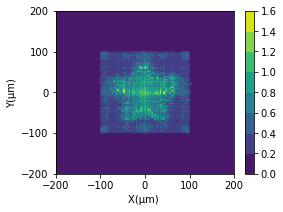

In [ ]:
fqFilter=edgeDetector.calConvFilter(edgeFilter_center,1e5)
Uec=edgeDetector.generate_image(U0,fqFilter)
labels=['X(μm) ','Y(μm)']
range=[[-actualSize/2.0,actualSize/2.0]]*2
#hp.displace_2d(np.log(hp.intensity(Ue)),labels,range,enableColorBar=True)
hp.displace_2d(np.flip(hp.intensity(Uec),(0,1)),labels,range,enableColorBar=True)

##### Zoom In

None Filter

In [ ]:
resImg=np.flip(hp.intensity(Uen),(0,1))
zoomResImg=hp.zoom_in(resImg,imgActualSize,actualSize,N_size)

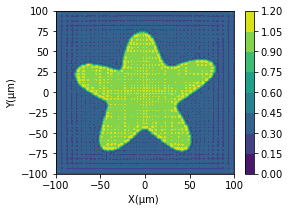

In [ ]:
labels=['X(μm) ','Y(μm)']
range=[[-imgActualSize/2.0,imgActualSize/2.0]]*2
#hp.displace_2d(np.log(hp.intensity(Ue)),labels,range,enableColorBar=True)
hp.displace_2d(zoomResImg,labels,range,enableColorBar=True)

Scharr Filter

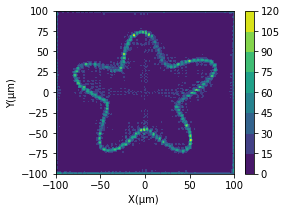

In [ ]:
resImg=np.flip(hp.intensity(Ues),(0,1))
imageZoomInterval=int(imgActualSize/actualSize*N_size)
pad=0
zoomResImg=resImg[N_size//2-imageZoomInterval//2+pad:N_size//2+imageZoomInterval//2-pad,\
    N_size//2-imageZoomInterval//2+pad:N_size//2+imageZoomInterval//2-pad]
labels=['X(μm) ','Y(μm)']
range=[[-imgActualSize/2.0,imgActualSize/2.0]]*2
#hp.displace_2d(np.log(hp.intensity(Ue)),labels,range,enableColorBar=True)
hp.displace_2d(zoomResImg,labels,range,enableColorBar=True)

Center Filter

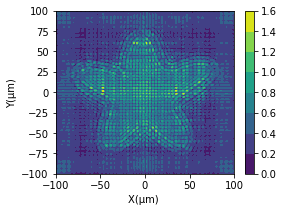

In [ ]:
resImg=np.flip(hp.intensity(Uec),(0,1))
imageZoomInterval=int(imgActualSize/actualSize*N_size)
pad=0
zoomResImg=resImg[N_size//2-imageZoomInterval//2+pad:N_size//2+imageZoomInterval//2-pad,\
    N_size//2-imageZoomInterval//2+pad:N_size//2+imageZoomInterval//2-pad]
labels=['X(μm) ','Y(μm)']
range=[[-imgActualSize/2.0,imgActualSize/2.0]]*2
#hp.displace_2d(np.log(hp.intensity(Ue)),labels,range,enableColorBar=True)
hp.displace_2d(zoomResImg,labels,range,enableColorBar=True)

#### Play with other images

##### Image 1: Maki

Load the image

In [ ]:
filename='Prob3Data.png'
imgActualSize=200

grayImg=cv2.imread(os.path.join(dataPath,filename),cv2.IMREAD_GRAYSCALE)
grayImg=cv2.flip(grayImg,0)
grayImg=hp.normalize(grayImg)
targetImg=hp.pad_and_resize(grayImg,imgActualSize,actualSize,N_size)

labels=['X(μm) ','Y(μm)']
range=[[-actualSize/2.0,actualSize/2.0]]*2
hp.displace_2d(targetImg,labels,range)